In [2]:
import numpy as np

# 3. Linear Transformations

## 3.1 Subspaces of $\mathbb{R}^n$

This section focuses on subsets of $\mathbb{R}^n$ that preserve $\mathbb{R}^n$'s linear structure. We will see that any matrix $m\times n$ matrix $A$ admits two important subspaces that contain useful information about the solution set of $A\vec{x} = \vec{b}$ for some $\vec{b}\in \mathbb{R}^m$ 

### Column space and null space

A __subspace__ of $\mathbb{R}^n$ is a subset $H \subset \mathbb{R}^n$ that is closed under addition and scalar multiplication in the following sense:

1. $\vec{u} + \vec{v} \in H \quad \forall \vec{u}, \vec{v} \in H$.
2. $r\vec{u} \in H \quad \forall \vec{u} \in H$ and $\forall r \in \mathbb{R}$.

Note that we can choose $c = 0$, which implies $\vec{0}$ is an element of any subspace. The smallest subspaces of $\mathbb{R}^n$ is $H = \{\vec{0}\}$ and the largest possible subspace of $\mathbb{R}^n$ is itself. Other subspaces of $\mathbb{R}^n$ are lines, planes, and their $n$-dimentional counterparts ($n\geq 3$) that pass through the origin.

```{admonition} Example 1

Let $\vec{u}, \vec{v} \in \mathbb{R}^2$. Show that $H := \text{span}(\vec{u}, \vec{v})$ is a subspace of $\mathbb{R}^2$. 
```
__Solution:__ 

Recall that the span of a set of vectors is the set of all possible linear combinations of those vectors. Let $\vec{x}, \vec{y} \in \text{span}(\vec{u}, \vec{v})$ and $r \in \mathbb{R}$. There exist $c_1, c_2, d_1, d_2 \in \mathbb{R}$ such that $\vec{x} = c_1 \vec{u} + c_2 \vec{v}$ and $\vec{y} = d_1 \vec{u} + d_2 \vec{v}$. We have: 

$$
\vec{x} + \vec{y} = (c_1 + d_1)\ \vec{u} + (c_2 + d_2)\ \vec{v} \quad \text{and} \quad  r\vec{x} = (rc_1)\ \vec{u} + (rc_2)\ \vec{v}
$$

Both of these vectors are in $H$. 

In general, if $\vec{u}_1, \vec{u}_2, \dots, \vec{u}_p \in \mathbb{R}^n$, then the span of of  $\vec{u}_1, \vec{u}_2, \dots, \vec{u}_p$, is a subspace $H\subset \mathbb{R}^n$, and we say H is __spanned (or generated)__ by $\vec{u}_1, \vec{u}_2, \dots, \vec{u}_p$.

Any $m \times n$ matrix $A is associated with important subspaces:

1. The __column space__ of $A$, denoted by $\text{col}(A)$, is the span of the columns of $A$: 

$$
col (A) = \text{span}(\{ \vec{a}_1, \vec{a}_2, \dots, \vec{a}_n\})
$$

where $\vec{v_i}$s are the columns of $A$ for $i = 1,2,\dots, n$. By definition, $col (A)$ is a subspace of $\mathbb{R}^m$.




2. The __null space__ $A$, denoted by $null (A)$, is the solution set of the homogeneous equation $A\vec{x} = \vec{0}$:

$$
null(A) = \{\vec{x}: \ A\vec{x} = \vec{0}\}
$$

By Theorem 2 in subsection 1.2, $\text{null}(A)$ is a subspace of $\mathbb{R}^n$.


```{admonition} Example 2

Let $A = \begin{bmatrix} 1 & -1 \\ 2 & 1 \\ -1 & 3 \\ \end{bmatrix}$.

1. Find $col(A)$ and $null(A)$.
2. Is $\vec{b} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \in \text{col}(A)$?
3. Is $\vec{u} = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \in \text{null}(A)$?
```
__Solution:__

1. $col(A) = \text{span} \left\lbrace\ \begin{bmatrix} 1\\ 2\\ -1 \end{bmatrix}, \begin{bmatrix} -1\\ 1\\ 3\end{bmatrix}\ \right\rbrace $.

To find $null(A)$, we solve the homogeneous equation $A\vec{x} = \vec{0}$. Let's set up the augmented matrix $[A \ | \ \vec{0}]$ and row-reduce it:

In [1]:
M = np.array([[1, -1, 0], [2, 1, 0], [-1, 3, 0]])
M

array([[ 1, -1,  0],
       [ 2,  1,  0],
       [-1,  3,  0]])

In [3]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row by the sum of itself and a multiple of another 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix 

In [4]:
M1 = replace(M, 1, 0, -2)
M1

array([[ 1., -1.,  0.],
       [ 0.,  3.,  0.],
       [-1.,  3.,  0.]])

In [5]:
M2 = replace(M1, 2, 0, 1)
M2

array([[ 1., -1.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  2.,  0.]])

In [6]:
M3 = scale(M2, 1, 1/3)
M3

array([[ 1., -1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  2.,  0.]])

In [7]:
M4 = replace(M3, 2, 1, -2)
M4

array([[ 1., -1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.]])

Therefore, 

$$\begin{bmatrix} 1 & -1 & | & 0 \\ 2 & 1 & | & 0 \\ -1 & 3 & | & 0 \end{bmatrix} \Rightarrow \begin{bmatrix} 1 & -1 & | & 0 \\ 0 & 1 & | & 0 \\ 0 & 0 & | & 0 \end{bmatrix}.$$

From the row-reduced form, we can see that all columns are pivot and there is no free variable. In other words, the only solution to the system is the trivial solution: $null(A)=0$

2. $\vec{b} \in \text{col}(A)$ if and only if $\vec{b}$ is a linear combination of the columns of $A$. In other words, if and only if the equation $A\vec{x} = \vec{b}$ has a solution. Let's set up the augmented matrix $[A \ | \ \vec{b}]$ and row-reduce it:

In [8]:
import numpy as np

M = np.array([[1, -1, 1], [2, 1, 2], [-1, 3, 1]])
M

array([[ 1, -1,  1],
       [ 2,  1,  2],
       [-1,  3,  1]])

In [9]:
M1 = replace(M, 1, 0, -2)
M1

array([[ 1., -1.,  1.],
       [ 0.,  3.,  0.],
       [-1.,  3.,  1.]])

In [10]:
M2 = replace(M1, 2, 0, 1)
M2

array([[ 1., -1.,  1.],
       [ 0.,  3.,  0.],
       [ 0.,  2.,  2.]])

In [11]:
M3 = scale(M2, 1, 1/3)
M3

array([[ 1., -1.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  2.,  2.]])

In [12]:
M4 = replace(M3, 2, 1, -2)
M4

array([[ 1., -1.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  2.]])

Clearly, the last two rows show that the system is inconsistent. Thus, $\vec{b}$ is not in $\text{col}(A)$.

3. No, $null(A)$ is trivial. We can verify this directly:

$\vec{u} \in \text{null}(A)$ if and only if $A\vec{u} = \vec{0}$:

In [13]:
A = np.array([[1, -1], [2, 1], [-1, 3]])
A

array([[ 1, -1],
       [ 2,  1],
       [-1,  3]])

In [14]:
u = np.array([[1],[1]])
u

array([[1],
       [1]])

In [15]:
#computing Au

Au = A @ u
Au

array([[0],
       [3],
       [2]])

Thus, $\vec{u}$ is not in $null(A)$.


```{admonition} Example 3

Suppose $A$ is an invertible $n\times n$ matrix. Then, by the Invertible Matrix Theorem (Theorem 4 in section 2.1), we have the following:

1. $col(A) = \mathbb{R}^n$
2. $null(A) = \{0\}$
```

### Basis, Dimension, and Rank


Let $H \subset \mathbb{R}^n$ be a subspace. A __basis__ for $H$ is a linearly independent set in $H$ that spans $H$.

According to the Invertible Matrix Theorem (Theorem 4 in section 2.1), the columns of an invertible $n\times n$ matrix form a linearly independent set that spans $\mathbb{R}^n$. Thus, the column space of any invertible matrix is a basis for $\mathbb{R}^n$. It's important to note that bases are not unique.

```{admonition} Example 4 (The Standard Basis)

Let 

$$
I_n = \begin{bmatrix} \vec{e}_1 & \vec{e}_2 & \dots & \vec{e}_n \end{bmatrix}
$$

be the identity matrix. The columns of $I_n$, denoted by 

$$
\vec{e}_1, \vec{e}_2, \dots, \vec{e}_n,
$$

form a basis for $\mathbb{R}^n$, which is called the standard basis of $\mathbb{R}^n$. For instance, the standard basis elements for $\mathbb{R}^3$ are 

$$
 \vec{e_1} = \begin{bmatrix} 1 \\ 0 \\ 0   \end{bmatrix}, \vec{e_2} = \ \begin{bmatrix} 0 \\ 1 \\ 0   \end{bmatrix},\ \vec{e_3} = \begin{bmatrix} 0 \\ 0 \\ 1   \end{bmatrix}
$$
The following cell computes the standard basis of $\mathbb{R}^4$
```

In [16]:
#the 4x4 identity matrix
I = np.eye(4)

print(' e1 = \n', np.array([I[0]]).T, '\n')
print(' e2 = \n', np.array([I[1]]).T, '\n')
print(' e3 = \n', np.array([I[2]]).T, '\n')
print(' e4 = \n', np.array([I[3]]).T, '\n')


 e1 = 
 [[1.]
 [0.]
 [0.]
 [0.]] 

 e2 = 
 [[0.]
 [1.]
 [0.]
 [0.]] 

 e3 = 
 [[0.]
 [0.]
 [1.]
 [0.]] 

 e4 = 
 [[0.]
 [0.]
 [0.]
 [1.]] 



__A basis for col A__

The column space of a matrix $A$ is generated by the set of all columns of $A$. If $A$ is invirtible, by invirtible matrix theorem, the columns are all pivot columns and form a linearly independent set and therefore, a basis for col $A$. In general we have:  

`````{admonition}Theorem 13
:class: tip
The pivot columns of a matrix $A$ form a basis for $col(A)$.
`````

```{admonition} Example 5

Suppose 

$$
A = \begin{bmatrix} 1 & 3 & 3 & 2 & -9 \\ -2 & -2 & 2 & -8 & 2 \\ 2 & 3 & 0 & 7 & 1 \\ 3 & 4 & -1 & 11 & 8 \end{bmatrix}.
$$

1. Find a basis for $col(A)$.
2. Find a basis for $null(A).$
```

__Solution__

1. We reduce $A$ to its reduced row echelon form (RREF) to find its pivot columns:

In [17]:
A = np.array([[1,3,3,2,-9], [-2,-2,2,-8,2], [2,3,0,7,1], [3,4,-1,11,8]])
A

array([[ 1,  3,  3,  2, -9],
       [-2, -2,  2, -8,  2],
       [ 2,  3,  0,  7,  1],
       [ 3,  4, -1, 11,  8]])

In [18]:
A1 = replace(A, 1, 0, 2)
A2 = replace(A1, 2, 0, -2)
A3 = replace(A2, 3, 0, -3)
A4 = scale(A3, 1, 1/4)
A5 = replace(A4, 2, 1, 3)
A6 = replace(A5, 3, 1, 5)
A7 = scale(A6, 2, 1/7)
A8 = replace(A7, 0, 1, -3)
A9 = replace(A8, 3, 2, -15)
A10 = replace(A9, 1, 2, 4)
A11 = replace(A10, 0, 2, -3)
A11

array([[ 1.,  0., -3.,  5.,  0.],
       [ 0.,  1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

We can see from the RREF of $A$ that $A$ has 3 pivot columns, which are the first two columns and the last column. Therefore, a basis for $\text{col}(A)$ is the set consisting of the first two columns and the last column of $A$:

$$
\left\lbrace \begin{bmatrix} 1 \\ -2 \\ 2 \\ 3 \end{bmatrix}, \begin{bmatrix} 3 \\ -2 \\ 3 \\ 4 \end{bmatrix}, \begin{bmatrix} -9 \\ 2 \\ 1 \\ 8 \end{bmatrix} \right\rbrace
$$

It's important to note that the columns of the RREF of $A$ are not necessarily in $\text{col}(A)$, and we cannot use them to form a basis for $\text{col}(A)$.

2. To find a basis for $\text{null}(A)$, we solve $A\vec{x}=0$ in the usual manner. Let's form the augmented matrix $[A \ | \ \vec{0}]$:

In [19]:
A0 = np.array([[1,3,3,2,-9,0], [-2,-2,2,-8,2,0], [2,3,0,7,1,0], [3,4,-1,11,8,0]])
A1 = replace(A0, 1, 0, 2)
A2 = replace(A1, 2, 0, -2)
A3 = replace(A2, 3, 0, -3)
A4 = scale(A3, 1, 1/4)
A5 = replace(A4, 2, 1, 3)
A6 = replace(A5, 3, 1, 5)
A7 = scale(A6, 2, 1/7)
A8 = replace(A7, 0, 1, -3)
A9 = replace(A8, 3, 2, -15)
A10 = replace(A9, 1, 2, 4)
A11 = replace(A10, 0, 2, -3)
A11

array([[ 1.,  0., -3.,  5.,  0.,  0.],
       [ 0.,  1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

From this we can see that the general solution is:


$$
\begin{bmatrix}x_1\\ x_2\\x_3\\ x_4\\ x_5 \end{bmatrix} = \begin{bmatrix} 3x_3 - 5x_4 \\ -2x_3 +x_4 \\x_3\\ x_4\\ 0\end{bmatrix} = x_3\begin{bmatrix} 3\\ -2\\ 1\\ 0\\ 0\end{bmatrix} + x_4 \begin{bmatrix} - 5 \\  1 \\0\\ 1\\ 0\end{bmatrix} = span(\ \begin{bmatrix} 3\\ -2\\ 1\\ 0\\ 0\end{bmatrix}, \begin{bmatrix} - 5 \\  1 \\0\\ 1\\ 0\end{bmatrix}\ )
$$

It is also clear that $\begin{bmatrix} 3\\ -2\\ 1\\ 0\\ 0\end{bmatrix}$ and $\begin{bmatrix} - 5 \\  1 \\0\\ 1\\ 0\end{bmatrix}$ are linearly independent. So they form a basis for $null(A)$.


Note that a subspace $H$ can have different bases. For example, the following sets are both bases for $\mathbb{R}^2$:


$$ B = \left\{ \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix}   \right\}\quad  \text{and} \quad G = \left\{ \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \begin{bmatrix} 2 \\ 1 \end{bmatrix}   \right\}
$$

However, all bases have something in common: 


`````{admonition} Theorem 14

 All bases of a subspace $H$ in $\mathbb{R}^n$ have the same number of vectors.

The __dimension__ of a subspace $H$, denoted as $dim(H)$, is the number of vectors in any of its bases. Furthermore, we define $dim(\{\vec{0}\})$ to be $0$. The dimension of the column space of a matrix $A$, denoted as $rank(A)$, is referred to as the __rank__ of $A$.

`````



```{admonition} Example 6

Show that $dim(\mathbb{R}^n) = n.$

```

__Solution:__

 We can use Example 6, where it was shown that the columns of the identity matrix $I_n$, denoted as $\{\vec{e}_1, \dots, \vec{e}_n\}$, form a basis for $\mathbb{R}^n$. 

Since there are $n$ columns in the identity matrix $I_n$, the dimension of $\mathbb{R}^n$ is equal to $n$. Hence, $dim(\mathbb{R}^n) = n$.

```{admonition} Example 7

Find the rank of subspaces of $\mathbb{R}^3$.

```
__Solution:__

In $\mathbb{R}^3$, we have the following subspaces:

1. The zero subspace $\{\vec{0}\}$, which has zero dimension.

2. Lines passing through the origin, which have one dimension: every line in $\mathbb{R}^3$ can be spanned by a vector.

3. Planes passing through the origin, which have two dimensions: every plane in $\mathbb{R}^3$ can be spanned by two linearly independent vectors.

4. The entire space $\mathbb{R}^3$, which has three dimensions.


 The next Theorem states that the sum of the dimensions of the column space and null space is equal to the number of columns in the matrix. Additionally, it provides a way to determine the dimensions of the column space and null space based on the number of pivot and non-pivot columns in the matrix, respectively.

`````{admonition} Theorem 15 (Rank-Nulity Theorem)


If $A$ be an $m \times n$ matrix, then $dim(col(A)) + dim(null(A)) = n$. Moreover, 


1. $dim(col(A)) =$ the number of pivot columns of $A$.

2. $dim(null(A)) =$ the number of non-pivot columns of $A$.

`````

```{admonition} Example 8

Find the rank and dimension of $null(A)$, where $A = \begin{bmatrix} 1 & 3 &3 & 2 &-9 \\ -2 & -2 & 2 & -8 &2 \\ 2 & 3 &0 & 7 & 1 \\ 3 & 4 & -1 & 11 & 8 \end{bmatrix}$
`````

__Solution__ 

From the solution of Example 7, We know that the RREF of $A$ is 

In [35]:
A11

array([[ 1.,  0., -3.,  5.,  0.,  0.],
       [ 0.,  1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

Which has three pivot columns and two non-pivot columns. Therefore, $rank(A) = 3$ and $dim(null(A)) = 2$



### Exercises

```{admonition}Exercises

1. Determine which one of the follwing sets are a subspace:

    a.   
    
    $$
    H = \left\lbrace \  \begin{bmatrix} x \\ y \\ z \end{bmatrix} \in \mathbb{R}^3 \mbox{ with } x \geq 0, \right\rbrace.
    $$
    
    b. 
    
    $$
    H = \left\lbrace \ \begin{bmatrix}
x \\ 1 \\2x 
\end{bmatrix} \in \mathbb{R}^3 \right\rbrace.
$$


2. Let 

$$
A = \begin{bmatrix} 1 & 2 &-9 \\ -2 & -2 & 2 \\ 2 & 3 &0 \end{bmatrix}.
$$  
Find the dimension of $col(A)$ and $null(A)$.


3. Suppose $A$ is a $5 \times 5$ matrix, and $A$ has 3 pivot columns. 

    a. Prove that $A\vec{x}=\vec{0}$ must have nontrivial solutions.
    
    b. Is there an example of $A$ where $col(A)= null(A)$?

 
4. Find an explicit example of a $4\times 4$ matrix $A$ which has $colA = null(A)$ 
```

## 3.2  Introduction to Linear Transformation

This section introduces linear transformations (sometimes referred to as linear maps) and explores their relationship with linear systems. We discuss how the existence and uniqueness of solutions to linear systems can be reformulated in terms of linear transformations.

### Motivation


 In many applications, the matrix equation arises in a way that is not directly connected to linear combinations of vectors. In fact, we think of an $m \times n$ matrix $A$ as a function that transforms $\vec{x}\in \mathbb{R}^m$ to $A\vec{x}\in \mathbb{R}^n$. With this perspective, finding the solution set of a linear system $A\vec{x}=\vec{b}$ is the same as finding the set of all $\vec{x}$ that $A$ transforms into $\vec{b}$. Theorem 1 in the previous section states that:

1. $A(\vec{u}+ \vec{v}) = A \vec{u} + A \vec{v}$
2. $A(c\vec{u}) = c A\vec{u}$

In general any function with these properties is called  a _linear trasformation_. More precisely, a function 

$$
T: \mathbb{R}^m \to \mathbb{R}^n
$$ 

is a linear transformation if it satisfies the following conditions:

$$ 
T(\vec{u} + \vec{v}) = T(\vec{u}) + T(\vec{v}) \quad \forall \vec{u}, \vec{v} \in \mathbb{R}^m
$$


$$T(c \vec{u}) = cT(\vec{u}) \quad \forall \vec{u}\in \mathbb{R}^m \quad \text{and} \quad \forall c\in \mathbb{R}$$


These two conditions lead to the following useful fact:

$T: \mathbb{R}^m \to \mathbb{R}^n$ is a linear transformation if and only if 

1. $T(\vec{0}) = \vec{0}$ 
2. $T(c\vec{u} + d\vec{v}) = cT(\vec{u}) + dT(\vec{v}) \quad \forall \vec{u}, \vec{v} \in \mathbb{R}^m \quad \text{and}\quad  \forall c\in \mathbb{R}$


The last property can also be generalized to $n$ vectors:

$$
T(c_1\vec{u}_1 + c_2\vec{u}_2 + \dots + c_p\vec{u}_p) = c_1T(\vec{u}_1) + c_2T(\vec{u}_2) + \dots + c_pT(\vec{u}_p) \quad \text{where} \quad 1 \leq i \leq p
$$



This property states that $T$ preserves linear combinations of vectors.


```{admonition} Example 1

Show that

$T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ given by

$$
T\left( \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} \right) = \begin{bmatrix}
2x_2 \\ 0 \\ 3x_1
\end{bmatrix}.
$$

is a linear transfornation.
```
__Solution:__

 T is linear as shown below:

1. 

$$
T\left( \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} + \begin{bmatrix}
y_1 \\ y_2
\end{bmatrix} \right) = T\left( \begin{bmatrix}
x_1+y_1 \\ x_2+y_2
\end{bmatrix}  \right) =  \begin{bmatrix}
2(x_2+y_2) \\ 0 \\ 3(x_1+y_1)
\end{bmatrix} =  \begin{bmatrix}
2x_2+2y_2 \\ 0 \\ 3x_1+3x_2
\end{bmatrix}.
$$



$$
T\left( \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}\right) + T\left(\begin{bmatrix}
y_1 \\ y_2
\end{bmatrix} \right)  =  \begin{bmatrix}
2x_2 \\ 0 \\ 3x_1
\end{bmatrix} +\begin{bmatrix}
2y_2 \\ 0 \\ 3y_1
\end{bmatrix} =  \begin{bmatrix}
2x_2+2y_2 \\ 0 \\ 3x_1+3x_2
\end{bmatrix}.
$$


2. 
$$
T\left( c\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} \right)  = T\left( \begin{bmatrix}
c x_1 \\ c x_2
\end{bmatrix} \right)     = \begin{bmatrix}
2cx_2 \\ 0 \\ 3cx_1
\end{bmatrix}.
$$

$$
cT\left( \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} \right) = c\begin{bmatrix}
2x_2 \\ 0 \\ 3x_1
\end{bmatrix} = \begin{bmatrix}
c2x_2 \\ 0 \\ c3x_1
\end{bmatrix}.
$$

Let's write a Python function for $T$:

In [21]:
import numpy as np

def T(V):
    W = np.zeros((3, 1))  # return the zero vector in R^3
    W[0, 0] = 2 * V[1, 0]  # change the first component to 2*x_2
    W[2, 0] = 3 * V[0, 0]  # change the third component to 3*x_1
    return W


Now, let's plug in some vectors:

In [22]:
# input vectors
V = np.array([[1], [1]])

U = np.array([[0], [0]])

#output vectors
W1 = T(V)
W2 = T(U)

print('T(V): \n \n', W1)

print(10*'*')

print('\n T(U):  \n\n', W2)

T(V): 
 
 [[2.]
 [0.]
 [3.]]
**********

 T(U):  

 [[0.]
 [0.]
 [0.]]


```{admonition} Example 2



Determine if $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ given by

$$
T\left( \begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} \right) = \begin{bmatrix}
2x_2 \\ 1 \\ 3x_1
\end{bmatrix}.
$$

is a linear transformation.

```

__Solution:__ T is not linear, since

$
T \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix} \right) = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} \neq \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}
$


```{admonition} Example 3

Let 

$$
A=\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}.
$$

Prove that the transformation 

$$
T: \mathbb{R}^3 \rightarrow \mathbb{R}^3
$$ 

defined by $T(\vec{x})= A\vec{x}$ is a linear transformation. $T$ is called the __projection__ onto the $xy$-plane.

__Solution:__

The transformation $T$ is defined by a matrix multiplication. According to Theorem 1 in the previous section, the matrix product satisfies the linearity property. $T$ is called a projection because when applied to 

$$
\vec{u} = \begin{bmatrix} x\\ y\\ z \end{bmatrix},
$$

it doesn't affect the first two components and replaces $z$ with zero. Let's verify this by evaluating it for 

$$
\vec{u} = \begin{bmatrix} 1\\ 3\\ 5 \end{bmatrix}
$$:

In [23]:
# matrix A
A = np.array([[1,0,0],[0,1,0],[0,0,0]])

# vector U
U = np.array([[1,3,5]]).T


print('T maps \n\n', U,'\n\n to \n\n', A @ U)

T maps 

 [[1]
 [3]
 [5]] 

 to 

 [[1]
 [3]
 [0]]


```{admonition} Example 4

Let 

$$
A=\begin{bmatrix} 1 & \lambda \\ 0 & 1 \end{bmatrix}.
$$

Then, the transformation 

$$
T: \mathbb{R}^2 \rightarrow \mathbb{R}^2
$$ 

defined by $T(\vec{x})= A\vec{x}$ is a linear transformation and is called a __shear transformation__. 
```

For $\lambda = 2$, we have:

In [24]:
# matrix A
A = np.array([[1,2],[0,1]])  

# inpout data 
e1 = np.array([1,0])
e2 = np.array([0,1])

#output 
w1 = A @ e1
w2 = A @ e2


print('T maps \n\n', e1,'\n\n to \n\n', w1)

print(10*'*')

print('T maps \n\n', e2,'\n\n to \n\n', w2)

T maps 

 [1 0] 

 to 

 [1 0]
**********
T maps 

 [0 1] 

 to 

 [2 1]


Lets plot these vectors:

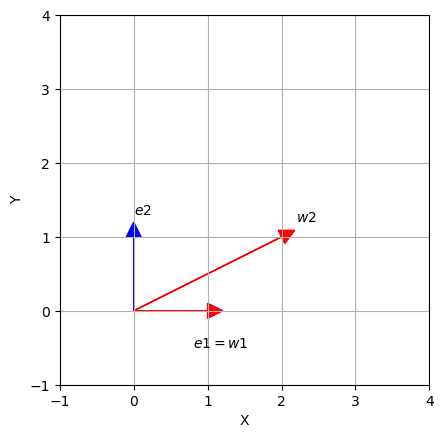

In [26]:
import matplotlib.pyplot as plt

ax = plt.axes()

ax.arrow(0, 0, 1, 0, head_width = 0.2,head_length = 0.2, fc ='b', ec ='b')
ax.arrow(0, 0, 1, 0, head_width = 0.2,head_length = 0.2, fc ='r', ec ='r')

ax.arrow(0, 0, 0, 1, head_width = 0.2,head_length = 0.2, fc ='b', ec ='b')
ax.arrow(0, 0, 2, 1, head_width = 0.2,head_length = 0.2, fc ='r', ec ='r')

ax.text(0.8,0 - 0.5,'$e1 = w1$')
ax.text(0,1.3,'$e2$')
ax.text(2.2,1.2,'$w2$')
            
ax.set_xticks(np.arange( -1, 5, step = 1))
ax.set_yticks(np.arange( -1, 5, step = 1))
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
    
plt.grid()
plt.show()

Observe that all points along $y$-axis remain fixed while other points are shifted parallel to $y$-axis by a distance proportional to their perpendicular distance from $x$-axis; more perciesley, 

$$
T(\begin{bmatrix} x \\ y \end{bmatrix}) = \begin{bmatrix} x+2y \\ y \end{bmatrix}.
$$


Shearing a plane figure does not change its area. The shear transformation can also be generalized to three dimensions:

Let 

$$
A=\begin{bmatrix} 1 & 0 & \lambda \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}.
$$. 

Then, the transformation 

$$
T: \mathbb{R}^3 \rightarrow \mathbb{R}^3
$$ 

defined by $T(\vec{x})= A\vec{x}$ is a shear transformation.


### The standard matrix representation of a linear transformation

As we have seen previously, any $m \times n$ matrix $A$ defines a linear transformation $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ given by $\vec{x} \mapsto A\vec{x}$. The converse of this statement is also true, as stated in the following theorem:

`````{admonition} Theorem 16

:class: tip

Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ be a linear transformation. There exists a unique $m \times n$ matrix $A$ such that $T(\vec{x}) = A\vec{x}$ for all $\vec{x} \in \mathbb{R}^n$. In fact, the $i$th column of matrix $A$ is given by $T(\vec{e_i})$, where $\vec{e_i} \in \mathbb{R}^n$ represents the $i$th column of the identity matrix $I_n$.

`````

The matrix $A$ is called __the standard matrix representation__ of $T$. The name is motivated by the fact that we are using the standard basis of $\mathbb{R}^n$, $\vec{e_i}$s, to contruct $A$.

```{admonition} Example 5

Find the standard matrix representation of the linear transformation in Example 1.
```

__Solution:__ 

We apply $T$ to the standard basis vectors $\vec{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\vec{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ to obtain the columns of the matrix representation $D$ of $T$:

$T(\vec{e_1}) = \begin{bmatrix} 2(0) \\ 0 \\ 3(1) \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 3 \end{bmatrix}$

$T(\vec{e_2}) = \begin{bmatrix} 2(1) \\ 0 \\ 3(0) \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \\ 0 \end{bmatrix}$

Thus, the standard matrix representation $D$ of $T$ is:

$$ 
D = \begin{bmatrix} 0 & 2 \\ 0 & 0 \\ 3 & 0\end{bmatrix}
$$

Lets write a python code for this example and verify our solution:

In [27]:
def T(V):
    W = np.zeros((3,1)) #returns the zero vector in R^3 
    W[0,0] = 2*V[1,0]   #changes the first component to 2*x_1
    W[2,0] = 3*V[0,0]   #changes the third component to 3*x_2
    return W

e1 = np.array([[1],[0]])
e2 = np.array([[0],[1]])

#the first column of A

c1 = T(e1)

#the second column of A

c2 = T(e2)

# formaing D

D = np.concatenate((c1,c2), axis =1)

D

array([[0., 2.],
       [0., 0.],
       [3., 0.]])

In Example 1, we saw that $T(\begin{bmatrix} 1\\1\\ \end{bmatrix})= \begin{bmatrix} 2\\0\\3\\ \end{bmatrix}$.
Let's verify that $D\begin{bmatrix} 1\\1\\ \end{bmatrix} = \begin{bmatrix} 2\\0\\3\\ \end{bmatrix}$:

In [28]:
v = np.array([[1],[1]])

D @ v 

array([[2.],
       [0.],
       [3.]])

```{admonition} Example 6

Consider the linear transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined as follows: $T\left(\vec{x}\right)$ first reflects $\vec{x}$ across the $x$-axis and then rotates it $90^\circ$ counterclockwise. Find the standard matrix representation of $T$.
```

__Solution:__

To find the standard matrix representation of $T$ we apply $T$ to the standard basis vectors of $\mathbb{R}^2$:

$T$ reflects $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ to itself and then rotates it to $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

$T$ reflects $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ to $\begin{bmatrix} 0 \\ -1 \end{bmatrix}$ and then rotates it to $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

Therefore, the standard matrix of $T$ is 

$$
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}.
$$



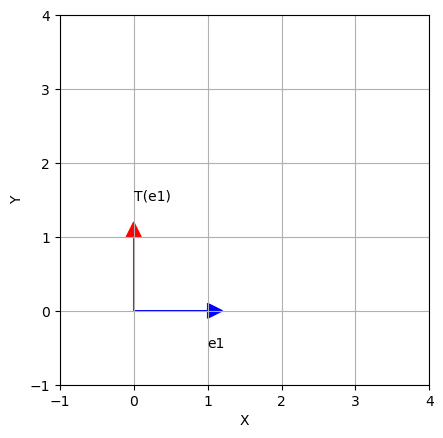

In [29]:
import matplotlib.pyplot as plt

ax = plt.axes()

ax.arrow(0, 0, 1, 0, head_width = 0.2,head_length = 0.2, fc ='b', ec ='b')
ax.arrow(0, 0, 0, 1, head_width = 0.2,head_length = 0.2, fc ='r', ec ='r')


ax.text(1,0 - 0.5,'e1')
ax.text(0,1 + 0.5,'T(e1)')


            
ax.set_xticks(np.arange( -1, 5, step = 1))
ax.set_yticks(np.arange( -1, 5, step = 1))
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
    
plt.grid()
plt.show()

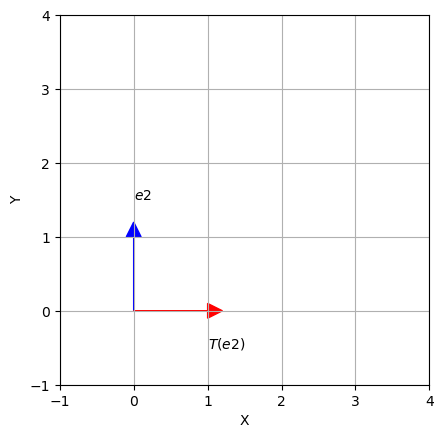

In [30]:
ax = plt.axes()

ax.arrow(0, 0, 0, 1, head_width = 0.2,head_length = 0.2, fc ='b', ec ='b')
ax.arrow(0, 0, 1, 0, head_width = 0.2,head_length = 0.2, fc ='r', ec ='r')


ax.text(0,1 + 0.5,'$e2$')
ax.text(1,0 - 0.5,'$T(e2)$')

            
ax.set_xticks(np.arange( -1, 5, step = 1))
ax.set_yticks(np.arange( -1, 5, step = 1))
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
    
plt.grid()
plt.show()

### Exercise

```{admonition} Exercises

1. Determine if each transformation is linear


   a. $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ given by

$$
T\left( \begin{bmatrix} x_1 \\ x_2  \end{bmatrix} \right) = \begin{bmatrix} x_2 \\ -x_1
\end{bmatrix}.
$$



   b. $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ given by 
    
$$
T\left( \begin{bmatrix} x_1 \\ x_2  \end{bmatrix} \right) = \begin{bmatrix} (x_1)^2 \\ 0 \end{bmatrix}.
$$




2. Find the standard matrix of $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ given by $T(\vec{x}) =$ first reflect $\vec{x}$ across the $x$-axis and then rotate $45^\circ$ counterclockwise.





3. Suppose $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ is a linear map and 

$$
T\left( \begin{bmatrix} 1 \\ 0 \end{bmatrix} \right) = \begin{bmatrix} 1 \\ 2 \\ 3
\end{bmatrix} \quad \text{and} \quad  T\left( \begin{bmatrix}
0 \\ 1 \end{bmatrix} \right) = \begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}.
$$

Find 
$$T \begin{bmatrix}
2 \\ 3
\end{bmatrix}.
$$

```